In [1]:
import mysql.connector
import os_environt_variables
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:

conn = mysql.connector.connect(host=os.environ.get('HOST_BD'),user=os.environ.get('USER_BD'),password= os.environ.get('PASSWORD_BD'),database=os.environ.get('DATABASE_BD') )

if conn.is_connected():
    print("Conexión exitosa a la base de datos.")
else:
    print("No se pudo establecer la conexión a la base de datos.") 


Conexión exitosa a la base de datos.


In [3]:
cursor = conn.cursor()

query = """ 
SELECT 
    se.student_id, 
    si.date_registered,
    MIN(se.date_watched) as first_date_watched,
    MIN(sp.date_purchased) as first_date_purchased,
    TIMESTAMPDIFF(DAY, si.date_registered, MIN(se.date_watched)) as date_diff_reg_watch,
    TIMESTAMPDIFF(DAY, MIN(se.date_watched), MIN(sp.date_purchased)) as date_diff_watch_purch

FROM 
    db_course_conversions.student_info as si
LEFT JOIN 
    db_course_conversions.student_engagement as se ON si.student_id = se.student_id
LEFT JOIN 
    db_course_conversions.student_purchases as sp ON se.student_id = sp.student_id
GROUP BY 
    si.student_id, si.date_registered
HAVING 
    se.student_id IS NOT NULL AND (date_diff_watch_purch >= 0 OR date_diff_watch_purch IS NULL)
"""
cursor.execute(query)
datos = cursor.fetchall()
df = pd.DataFrame(datos, columns = [x[0] for x in cursor.description])
conn.close()

In [4]:
# Teniendo los datos calculados, ahora vamos a aplicar una serie de analisis estadisticos tratando de obtener algunos insights
print(df.date_diff_reg_watch.describe())

count    20255.000000
mean         3.423895
std         19.294891
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        313.000000
Name: date_diff_reg_watch, dtype: float64


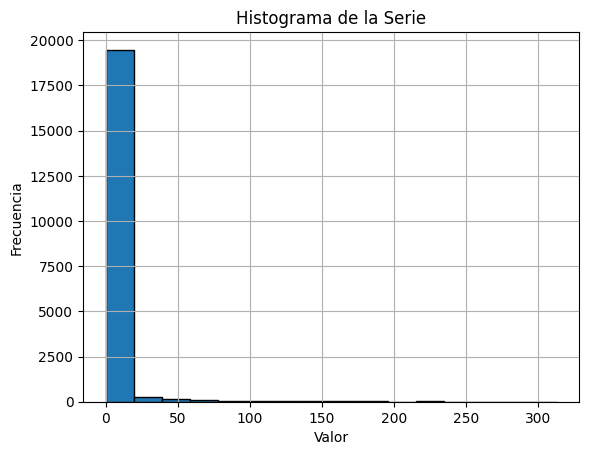

In [5]:
df.date_diff_reg_watch.hist(bins = 16, edgecolor = 'black') #aplicamos la regla de sturges para calcular un numero optimo de clases para la cantidad de datos que tenemos
# Configurar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Serie')

# Mostrar el histograma
plt.show()